In [1]:
import pandas as pd

In [2]:
train_titanic = pd.read_csv('titanic.csv')
train_titanic.set_index('PassengerId',inplace=True)

In [3]:
test_titanic = pd.read_csv('titanic_test.csv')
test_titanic.set_index('PassengerId',inplace=True)

In [4]:
titanic = pd.concat([train_titanic, test_titanic],axis=0,sort=False)

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_titanic.drop(["Name"],inplace=True,axis=1)

In [8]:
train_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [10]:
train_titanic["Embarked"].fillna(train_titanic["Embarked"].mode()[0],inplace=True)

In [11]:
train_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [12]:
titanic.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [13]:
titanic["Embarked"].fillna(train_titanic["Embarked"].mode()[0],inplace=True)

In [14]:
data=train_titanic[train_titanic["Age"].notnull()]

In [15]:
data.shape

(714, 10)

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt

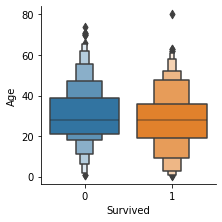

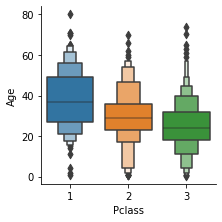

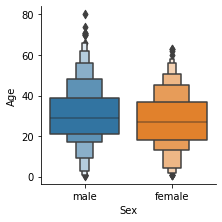

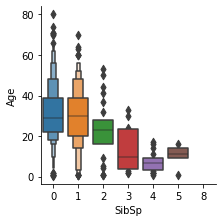

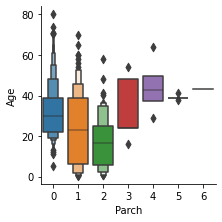

In [17]:
for i in ["Survived","Pclass","Sex","SibSp","Parch"]:
    sb.catplot(y = "Age", x = i, data = train_titanic.sort_values("Age", ascending = False), kind="boxen", height = 3, aspect = 1)
    plt.show()

In [18]:
train_titanic["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
train_titanic["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [20]:
train_titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Age ~ Pclass+Sex+Survived+SibSp+Parch+Embarked', data=train_titanic.dropna()).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [22]:
anova_table

,sum_sq,df,F,PR(>F)
Sex,0.080765,1.0,0.000414,0.983793
Embarked,2.639537,2.0,0.006762,0.993261
Pclass,4136.030433,1.0,21.191359,0.000008
Survived,1838.458031,1.0,9.419520,0.002485
SibSp,479.827832,1.0,2.458445,0.118680
Parch,2085.260281,1.0,10.684036,0.001298
Residual,34546.033752,177.0,NaN,NaN


In [23]:
def mean_of_age(pclass):
       x=train_titanic[train_titanic["Pclass"]==pclass]["Age"].mean()
       return x

In [24]:
import numpy as np

In [25]:
titanic['Age'] = titanic.apply(
    lambda row: mean_of_age(row["Pclass"]) if np.isnan(row['Age']) else row['Age'],
    axis=1)

In [26]:
train_titanic['Age'] = train_titanic.apply(
    lambda row: mean_of_age(row["Pclass"]) if np.isnan(row['Age']) else row['Age'],
    axis=1)

In [27]:
train_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

<AxesSubplot:>

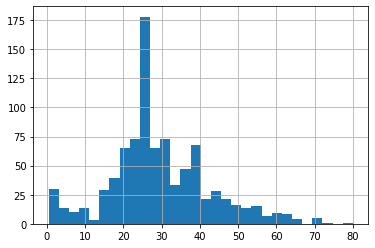

In [28]:
train_titanic["Age"].hist(bins=30)

<AxesSubplot:>

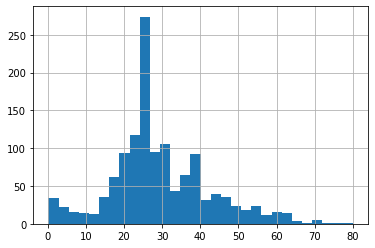

In [29]:
titanic["Age"].hist(bins=30)

In [30]:
titanic.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

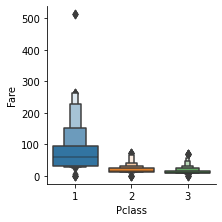

In [31]:
sb.catplot(y = "Fare", x = "Pclass", data = train_titanic.sort_values("Age", ascending = False), kind="boxen", height = 3, aspect = 1)
plt.show()

In [32]:
def mean_of_fare(pclass):
       x=train_titanic[train_titanic["Pclass"]==pclass]["Fare"].mean()
       return x

In [33]:
titanic['Fare'] = titanic.apply(
    lambda row: mean_of_age(row["Pclass"]) if np.isnan(row['Fare']) else row['Fare'],
    axis=1)

In [34]:
titanic.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

In [35]:
titanic.shape

(1309, 11)

In [36]:
titanic.drop(["Cabin"],inplace=True,axis=1)

In [37]:
titanic.drop(["Name"],inplace=True,axis=1)

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


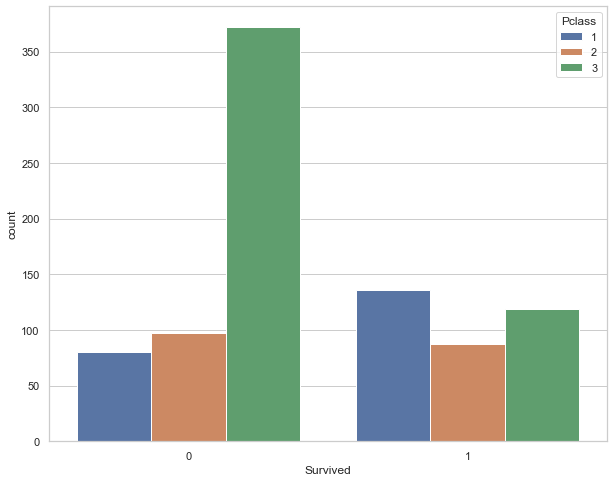

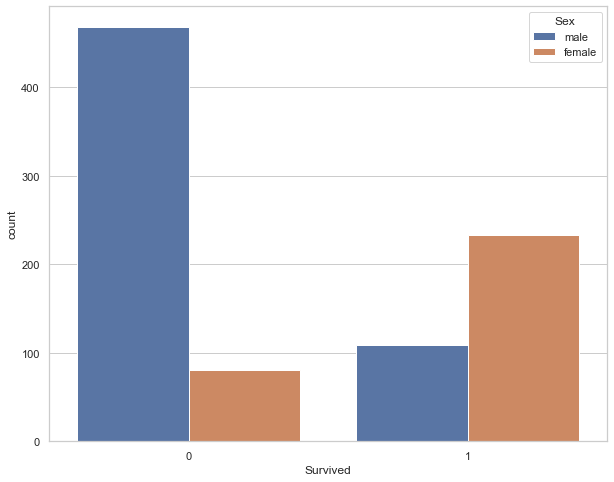

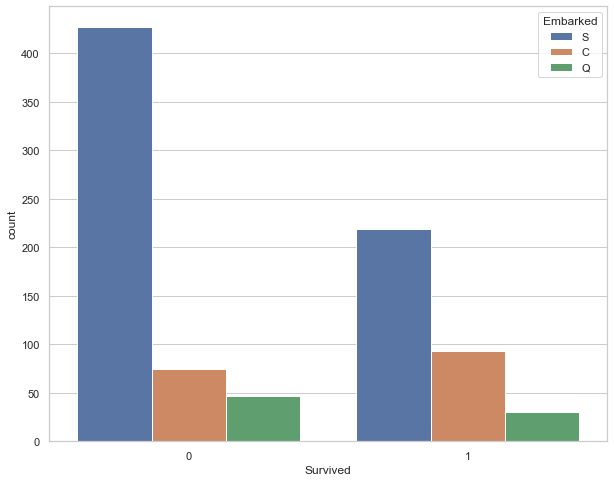

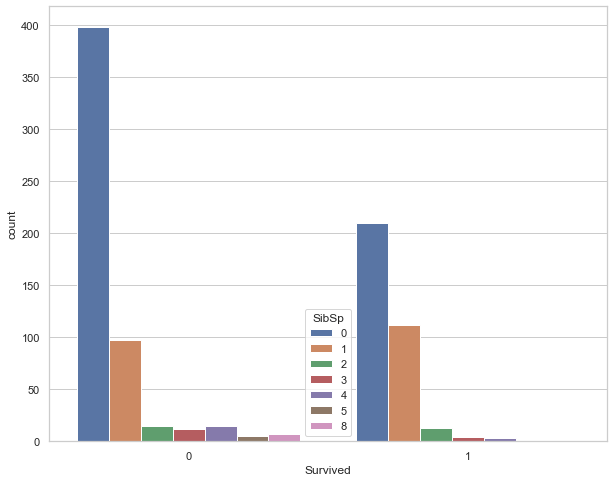

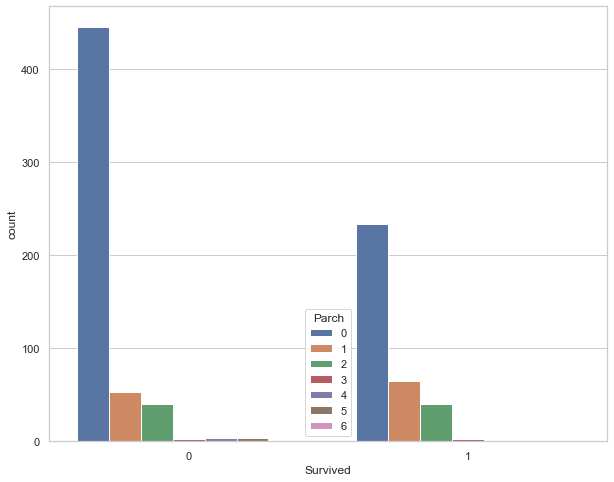

In [39]:
for i in ['Pclass','Sex',"Embarked","SibSp","Parch"]:
    plt.figure(figsize=(10,8))
    sb.set_theme(style="whitegrid")
    sb.countplot(x=train_titanic.Survived,hue=train_titanic[i])

In [40]:
import scipy.stats as stats
from scipy.stats import chi2
for i in ['Pclass','Sex',"Embarked","SibSp","Parch"]:
    dataset_table=pd.crosstab(train_titanic[i],train_titanic['Survived'])
    observed=dataset_table.values
    val2=stats.chi2_contingency(dataset_table)
    expected=val2[3]
    chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    p_value=1-chi2.cdf(x=chi_square_statistic,df=val2[2])
    if p_value<=0.01:
          print("Survived and "+i+" Dependent")

    else:
          print("Survived and "+i+" InDependent")

Survived and Pclass Dependent
Survived and Sex Dependent
Survived and Embarked Dependent
Survived and SibSp Dependent
Survived and Parch Dependent


In [41]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [42]:
train_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [43]:
grps=pd.unique(train_titanic.Sex.values)
for i in ["Age","Fare"]:
    d_data={grp:train_titanic[i][train_titanic.Sex == grp] for grp in grps}
    #print(d_data)
    F, p = stats.f_oneway(d_data["male"], d_data["female"])
    print(p)
    if p<0.01:
        print("Survived and "+i+" dependent")
    else:
        
        print("Survived and "+i+" Independent")

0.016290279138740718
Survived and Age Independent
4.230867870041279e-08
Survived and Fare dependent


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


In [45]:
titanic["Ticket"].value_counts()

CA. 2343         11
CA 2144           8
1601              8
S.O.C. 14879      7
PC 17608          7
                 ..
370376            1
C 17368           1
A/5. 2151         1
S.O./P.P. 752     1
A/4 31416         1
Name: Ticket, Length: 929, dtype: int64

In [46]:
titanic.shape

(1309, 9)

In [47]:
dic={1:3,2:2,3:1}

In [48]:
titanic["encode_pclass"]=titanic['Pclass'].map(dic)

In [49]:
titanic["encode_pclass"].value_counts()

1    709
3    323
2    277
Name: encode_pclass, dtype: int64

In [50]:
titanic['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [51]:
def pclass(c,column):
    x=train_titanic[train_titanic[column]==c]
    
    return x[x["Survived"]==1].shape[0]/x.shape[0]


In [52]:
titanic["encode_sex"]=titanic.apply(lambda x:pclass(x["Sex"],"Sex"),axis=1)

In [53]:
titanic["encode_sex"].value_counts()

0.188908    843
0.742038    466
Name: encode_sex, dtype: int64

In [54]:
titanic["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

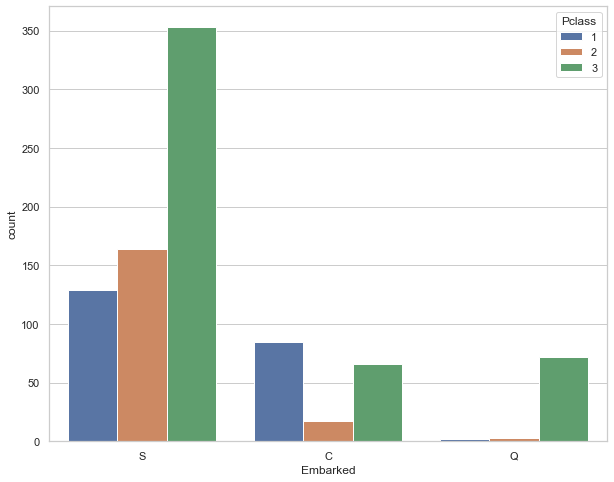

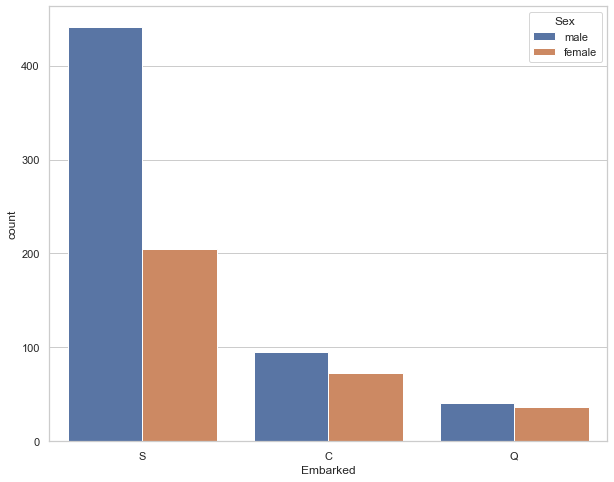

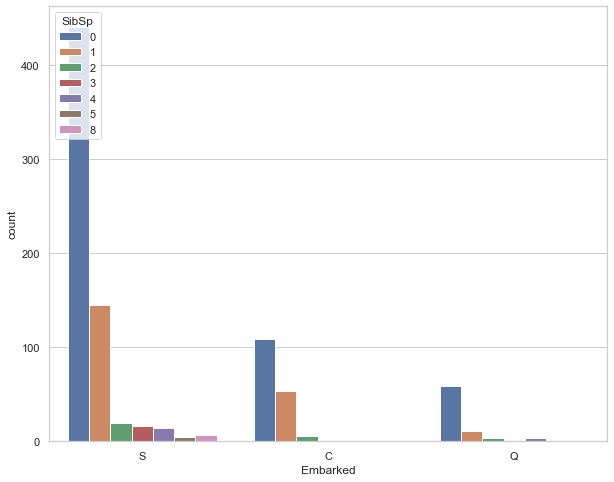

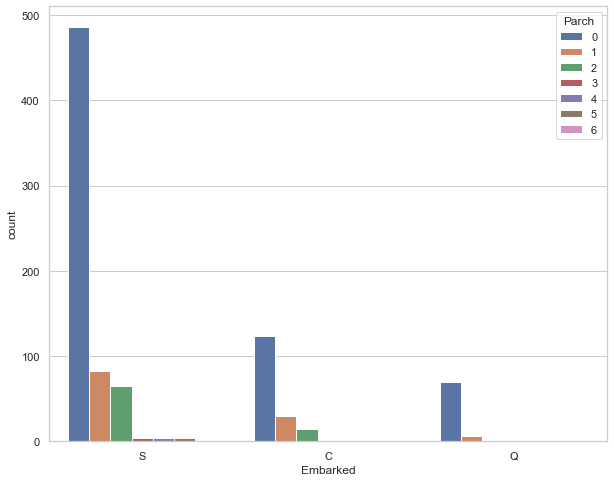

In [55]:
for i in ['Pclass','Sex',"SibSp","Parch"]:
    plt.figure(figsize=(10,8))
    sb.set_theme(style="whitegrid")
    sb.countplot(x=train_titanic.Embarked,hue=train_titanic[i])

In [56]:
def find_category_mappings(data, variable, target):
    tmp = pd.DataFrame(data.groupby([variable])[target].mean())
    print("tmp",tmp)
    tmp['non-target'] = 1 - tmp[target]
    print(tmp)
    tmp['ratio'] = np.log( tmp[target] / tmp['non-target'] )
    return tmp['ratio'].to_dict()

In [57]:
dic=find_category_mappings(train_titanic,'Embarked',"Survived")

tmp           Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009
          Survived  non-target
Embarked                      
C         0.553571    0.446429
Q         0.389610    0.610390
S         0.339009    0.660991


In [58]:
titanic["encode_embarked"]=titanic["Embarked"].map(dic)

In [59]:
dic

{'C': 0.21511137961694568, 'Q': -0.44895022004790314, 'S': -0.667712283412124}

In [60]:
titanic["encode_embarked"]

PassengerId
1      -0.667712
2       0.215111
3      -0.667712
4      -0.667712
5      -0.667712
          ...   
1305   -0.667712
1306    0.215111
1307   -0.667712
1308   -0.667712
1309    0.215111
Name: encode_embarked, Length: 1309, dtype: float64

In [61]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'encode_pclass', 'encode_sex', 'encode_embarked'],
      dtype='object')

In [62]:
["Survived","Age","SibSp","Parch","Fare","encode_pclass","encode_sex","encode_embarked"]
colu=["Survived","Age","SibSp","Parch","Fare","encode_pclass","encode_sex","encode_embarked"]

In [63]:
titanic.shape

(1309, 12)

In [64]:
train_titanic.shape

(891, 10)

In [65]:
train=titanic[colu].iloc[:891,:]

In [66]:
train.shape

(891, 8)

In [67]:
X,y=train[colu[1:]],train["Survived"]

In [68]:
from sklearn.model_selection import train_test_split as tts

In [69]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3)

In [70]:
y_train

PassengerId
377    1
763    1
859    1
842    0
194    1
      ..
38     0
401    1
367    1
579    0
365    0
Name: Survived, Length: 623, dtype: int64

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model1=RandomForestClassifier()

In [73]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
model1.feature_importances_

array([0.26056173, 0.04873631, 0.04094034, 0.28256021, 0.07491686,
       0.24712   , 0.04516454])

In [75]:
importances = model1.feature_importances_
indices = np.argsort(importances)

In [76]:
features=X.columns

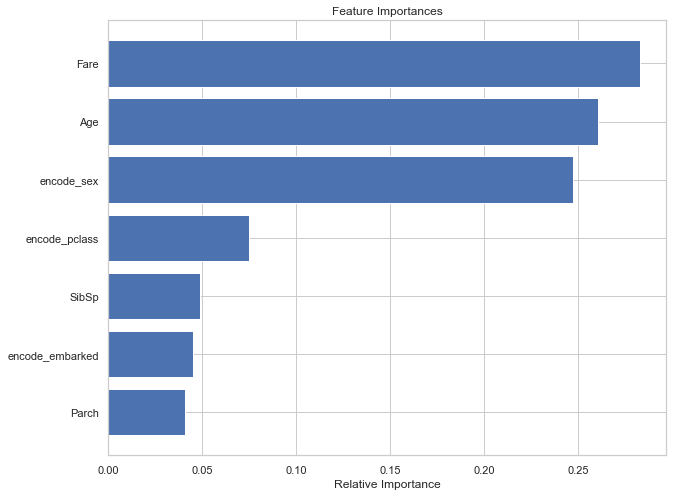

In [77]:
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [78]:
colu[1:]

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'encode_pclass',
 'encode_sex',
 'encode_embarked']

In [79]:
y_pred=model1.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [81]:
confusion_matrix(y_test,y_pred)

array([[135,  27],
       [ 25,  81]], dtype=int64)

In [82]:
accuracy_score(y_test,y_pred)

0.8059701492537313

In [83]:
param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

In [85]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [87]:
best_random = rf_random.best_estimator_

In [88]:
y_pred=best_random.predict(X_test)

In [89]:
confusion_matrix(y_pred,y_test)

array([[143,  25],
       [ 19,  81]], dtype=int64)

In [90]:
accuracy_score(y_test,y_pred)

0.835820895522388

In [91]:
test=titanic[colu].iloc[891:,:]

In [92]:
test

,Survived,Age,SibSp,Parch,Fare,encode_pclass,encode_sex,encode_embarked
PassengerId,,,,,,,,
892,0,34.50000,0,0,7.8292,1,0.188908,-0.448950
893,1,47.00000,1,0,7.0000,1,0.742038,-0.667712
894,0,62.00000,0,0,9.6875,2,0.188908,-0.448950
895,0,27.00000,0,0,8.6625,1,0.188908,-0.667712
896,1,22.00000,1,1,12.2875,1,0.742038,-0.667712
...,...,...,...,...,...,...,...,...
1305,0,25.14062,0,0,8.0500,1,0.188908,-0.667712
1306,1,39.00000,0,0,108.9000,3,0.742038,0.215111
1307,0,38.50000,0,0,7.2500,1,0.188908,-0.667712


In [98]:
X,y=test[colu[1:]],test["Survived"]

In [99]:
predictions=best_random.predict(X)

In [100]:
test_data = pd.read_csv('titanic_test.csv')

In [101]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_me.csv', index=False)

In [102]:
importances = model1.feature_importances_
indices = np.argsort(importances)

In [103]:
features=X.columns

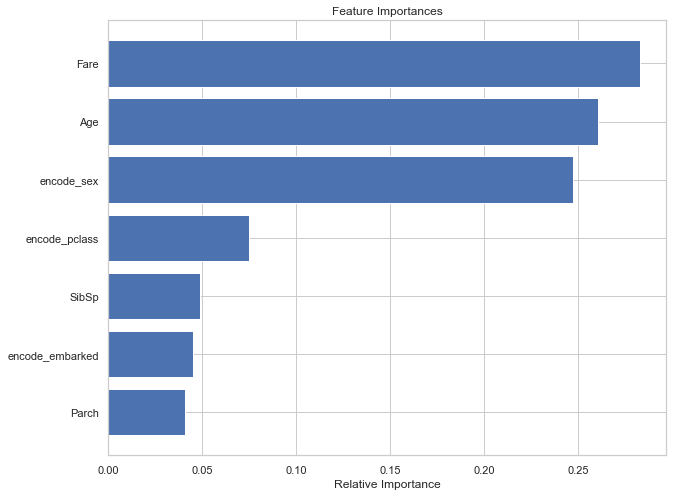

In [104]:
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()